## Notebook to control trading components

In [1]:
# import main modules
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
import os
import numpy as np
import pandas as pd
import pickle
import logging
import sys
sys.path.append('../')

In [2]:
# functional modules
import getpreparedata.getprepdata as gpd
import models.model as m
import models.trainer as trainer
import trader.trader_ml as t

In [3]:
# other modules for configurations and utilities
import configs.config as cfg
from common import utils as u

# here the instrument is chosen
# use .get_instruments() from oanda api to get the list. oanda conf file needed to execute
import configs.USD_PLN_1 as cfginst


In [4]:
# from configuration file imported, get instrument 
instrument = cfginst.instrument
# get or generate datafiles files and folders, if do not exist
namefiles_dict = {}
namefiles_dict = u.creates_filenames_dict(cfginst.instrument, 
                                          namefiles_dict, cfg)

## 1) Get Historical Data that will be used for Training

In [20]:
odc = gpd.OandaDataCollector(instrument=cfginst.instrument,
                         targets=cfginst.targets,
                         features=cfginst.features,
                         conf_file=cfg.conf_file,
                         namefiles_dict=namefiles_dict)
print('OandaDataCollector object created for instrument {}'.format(
    cfginst.instrument))
NEW_DATA = True
if NEW_DATA:
    # actual data collection of most recent data
    print('OandaDataCollector data collection starts...')
    odc.get_most_recent(granul=cfginst.granul, days = cfginst.days)
    odc.make_features()
    odc.make_lagged_features(lags=cfginst.lags)
    odc.resample_data(brl = cfginst.brl)
    odc.make_3_datasets()
    odc.standardize()
    odc.save_to_file()

    print("All row data downloaded from Oanda for instrument {}".format(
        cfginst.instrument))
    print(odc.raw_data.info(),  end="\n  ******** \n")
    print("Re-sampled data for bar length {} from Oanda for instrument {}".format(
                                                            cfginst.brl, cfginst.instrument))
    print(odc.raw_data_featured_resampled.info(),  end="\n  ******** \n")
else:
    print('OandaDataCollector data is loading from disk...')
    odc.load_data_from_file()
    odc.report()

INFO:root:__init__: Non existent Base folder: creating it...
INFO:root:get_most_recent: calling tpqoa get_history....


OandaDataCollector object created for instrument USD_PLN
OandaDataCollector data collection starts...
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 282594 entries, 2021-04-23 19:40:35+00:00 to 2021-05-21 20:59:55+00:00
Data columns (total 1 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   USD_PLN  282594 non-null  float64
dtypes: float64(1)
memory usage: 4.3 MB
get_most_recent: self.raw_data.info()  None
get_most_recent: self.raw_data                             USD_PLN
time                              
2021-04-23 19:40:35+00:00  3.76436
2021-04-23 19:40:40+00:00  3.76451
2021-04-23 19:40:45+00:00  3.76451
2021-04-23 19:40:50+00:00  3.76451
2021-04-23 19:41:00+00:00  3.76451
...                            ...
2021-05-21 20:59:35+00:00  3.69200
2021-05-21 20:59:40+00:00  3.69205
2021-05-21 20:59:45+00:00  3.69210
2021-05-21 20:59:50+00:00  3.69200
2021-05-21 20:59:55+00:00  3.69205

[282594 rows x 1 columns]


INFO:root:make_features: created new features and added to self.raw_data_featured


make_features: self.raw_data_featured.columns  Index(['USD_PLN', 'returns', 'dir', 'profit_over_spread', 'loss_over_spread',
       'sma', 'boll1', 'boll_std', 'min', 'max', 'mom', 'vol', 'boll'],
      dtype='object')


INFO:root:make_lagged_features: created new features and added to self.raw_data_featured


SEQUENCE: resample_data


INFO:root:resample_data: resampled the just created new features, into self.raw_data_featured_resampled
INFO:root:standardize: subtracting mean and dividing by standard deviation, for each feature!


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 22848 entries, 2021-04-23 19:43:00+00:00 to 2021-05-17 20:29:00+00:00
Data columns (total 83 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   USD_PLN             22848 non-null  float64
 1   returns             22848 non-null  float64
 2   dir                 22848 non-null  float64
 3   profit_over_spread  22848 non-null  float64
 4   loss_over_spread    22848 non-null  float64
 5   sma                 22848 non-null  float64
 6   boll1               22848 non-null  float64
 7   boll_std            22848 non-null  float64
 8   min                 22848 non-null  float64
 9   max                 22848 non-null  float64
 10  mom                 22848 non-null  float64
 11  vol                 22848 non-null  float64
 12  boll                22848 non-null  float64
 13  dir_lag_1           22848 non-null  float64
 14  dir_lag_2           22848 non-null  float64
 15  dir_la

INFO:root:save_to_file: Saving raw data and resampled raw data to /Users/ANDREA/PycharmProjects/OandaTrading/Data/USD_PLN/raw_data.csv and to /Users/ANDREA/PycharmProjects/OandaTrading/Data/USD_PLN/raw_data_featured_resampled.csv


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 22848 entries, 2021-04-23 19:43:00+00:00 to 2021-05-17 20:29:00+00:00
Data columns (total 83 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   USD_PLN             22848 non-null  float64
 1   returns             22848 non-null  float64
 2   dir                 22848 non-null  float64
 3   profit_over_spread  22848 non-null  float64
 4   loss_over_spread    22848 non-null  float64
 5   sma                 22848 non-null  float64
 6   boll1               22848 non-null  float64
 7   boll_std            22848 non-null  float64
 8   min                 22848 non-null  float64
 9   max                 22848 non-null  float64
 10  mom                 22848 non-null  float64
 11  vol                 22848 non-null  float64
 12  boll                22848 non-null  float64
 13  dir_lag_1           22848 non-null  float64
 14  dir_lag_2           22848 non-null  float64
 15  dir_la

INFO:root:save_to_file: Saving data input files to /Users/ANDREA/PycharmProjects/OandaTrading/Data/USD_PLN/
INFO:root:save_to_file: Save train_ds_std to /Users/ANDREA/PycharmProjects/OandaTrading/Data/USD_PLN/Train/train.csv
INFO:root:save_to_file: Save validation_ds_std to /Users/ANDREA/PycharmProjects/OandaTrading/Data/USD_PLN/Valid/valid.csv
INFO:root:save_to_file: Save test_ds_std to /Users/ANDREA/PycharmProjects/OandaTrading/Data/USD_PLN/Test/test.csv
INFO:root:save_to_file: saving data label files to /Users/ANDREA/PycharmProjects/OandaTrading/Data/USD_PLN/
INFO:root:save_to_file: saving params to file /Users/ANDREA/PycharmProjects/OandaTrading/Data/USD_PLN/Train/params.pkl


All row data downloaded from Oanda for instrument USD_PLN
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 282594 entries, 2021-04-23 19:40:35+00:00 to 2021-05-21 20:59:55+00:00
Data columns (total 1 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   USD_PLN  282594 non-null  float64
dtypes: float64(1)
memory usage: 4.3 MB
None
  ******** 
Re-sampled data for bar length 1min from Oanda for instrument USD_PLN
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 28560 entries, 2021-04-23 19:43:00+00:00 to 2021-05-21 20:59:00+00:00
Data columns (total 83 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   USD_PLN             28560 non-null  float64
 1   returns             28560 non-null  float64
 2   dir                 28560 non-null  float64
 3   profit_over_spread  28560 non-null  float64
 4   loss_over_spread    28560 non-null  float64
 5   sma                 28560 non-null  fl

## 2) Choose the model and train it on the data obtained

INFO:root:Loading data and creating the NN model...


load_train_data: reordered features are: ['dir_lag_1', 'sma_lag_1', 'boll_lag_1', 'min_lag_1', 'max_lag_1', 'mom_lag_1', 'vol_lag_1', 'dir_lag_2', 'sma_lag_2', 'boll_lag_2', 'min_lag_2', 'max_lag_2', 'mom_lag_2', 'vol_lag_2', 'dir_lag_3', 'sma_lag_3', 'boll_lag_3', 'min_lag_3', 'max_lag_3', 'mom_lag_3', 'vol_lag_3', 'dir_lag_4', 'sma_lag_4', 'boll_lag_4', 'min_lag_4', 'max_lag_4', 'mom_lag_4', 'vol_lag_4', 'dir_lag_5', 'sma_lag_5', 'boll_lag_5', 'min_lag_5', 'max_lag_5', 'mom_lag_5', 'vol_lag_5', 'dir_lag_6', 'sma_lag_6', 'boll_lag_6', 'min_lag_6', 'max_lag_6', 'mom_lag_6', 'vol_lag_6', 'dir_lag_7', 'sma_lag_7', 'boll_lag_7', 'min_lag_7', 'max_lag_7', 'mom_lag_7', 'vol_lag_7', 'dir_lag_8', 'sma_lag_8', 'boll_lag_8', 'min_lag_8', 'max_lag_8', 'mom_lag_8', 'vol_lag_8', 'dir_lag_9', 'sma_lag_9', 'boll_lag_9', 'min_lag_9', 'max_lag_9', 'mom_lag_9', 'vol_lag_9', 'dir_lag_10', 'sma_lag_10', 'boll_lag_10', 'min_lag_10', 'max_lag_10', 'mom_lag_10', 'vol_lag_10']
load_train_data: Lagged columns

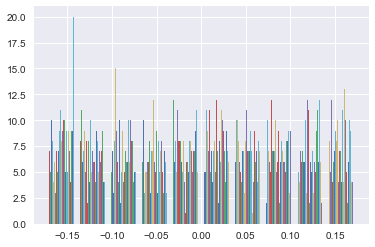

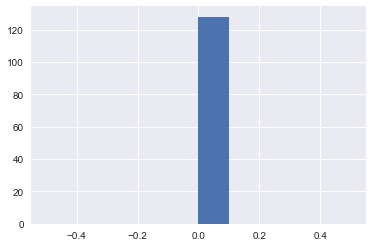

INFO:root:Training the NN model...


cw: using class 0 weight 0.816116588084012, class 1 weight 1.2908474576271187


Train on 20563 samples, validate on 2285 samples
Epoch 1/70
20563/20563 [==============================] - 9s 438us/sample - loss: 0.7181 - acc: 0.5286 - val_loss: 0.8405 - val_acc: 0.5405
Epoch 2/70
20563/20563 [==============================] - 5s 259us/sample - loss: 0.7046 - acc: 0.5479 - val_loss: 0.8248 - val_acc: 0.5427
Epoch 3/70
20563/20563 [==============================] - 4s 209us/sample - loss: 0.7010 - acc: 0.5456 - val_loss: 0.8176 - val_acc: 0.5322
Epoch 4/70
20563/20563 [==============================] - 4s 199us/sample - loss: 0.6974 - acc: 0.5488 - val_loss: 0.8129 - val_acc: 0.5300
Epoch 5/70
20563/20563 [==============================] - 5s 261us/sample - loss: 0.6951 - acc: 0.5504 - val_loss: 0.8122 - val_acc: 0.5208
Epoch 6/70
20563/20563 [==============================] - 4s 210us/sample - loss: 0.6936 - acc: 0.5528 - val_loss: 0.8074 - val_acc: 0.5287
Epoch 7/70
20563/20563 [==============================] - 4s 196us/sample - loss: 0.6916 - acc: 0.5492 - val_lo

Epoch 59/70
20563/20563 [==============================] - 4s 197us/sample - loss: 0.6637 - acc: 0.5999 - val_loss: 0.8461 - val_acc: 0.5361
Epoch 60/70
20563/20563 [==============================] - 4s 201us/sample - loss: 0.6640 - acc: 0.5992 - val_loss: 0.8523 - val_acc: 0.5532
Epoch 61/70
20563/20563 [==============================] - 4s 193us/sample - loss: 0.6640 - acc: 0.6015 - val_loss: 0.8560 - val_acc: 0.5444
Epoch 62/70
20563/20563 [==============================] - 4s 195us/sample - loss: 0.6629 - acc: 0.6007 - val_loss: 0.8586 - val_acc: 0.5479
Epoch 63/70
20563/20563 [==============================] - 4s 176us/sample - loss: 0.6637 - acc: 0.6038 - val_loss: 0.8540 - val_acc: 0.5379
Epoch 64/70
20563/20563 [==============================] - 4s 174us/sample - loss: 0.6633 - acc: 0.6002 - val_loss: 0.8570 - val_acc: 0.5453
Epoch 65/70
20563/20563 [==============================] - 4s 201us/sample - loss: 0.6614 - acc: 0.6078 - val_loss: 0.8543 - val_acc: 0.5510
Epoch 66/70
2

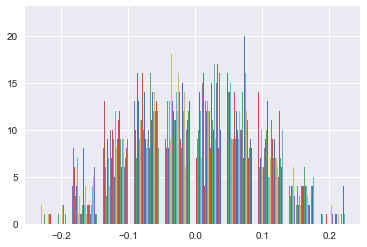

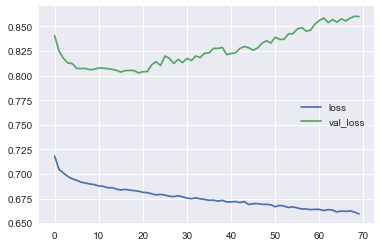

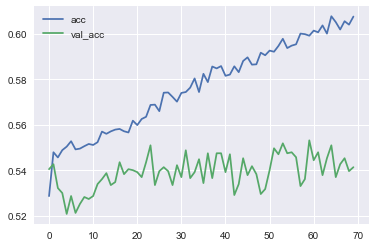

INFO:root:Evaluating the NN model...




main: Evaluating the model on in-sample data (training data)


22848/22848 [==============================] - 3s 137us/sample - loss: 0.6641 - acc: 0.6268
main: valuating the model on out-of-sample data (test data)


4284/4284 [==============================] - 1s 124us/sample - loss: 0.7025 - acc: 0.5348


INFO:root:Predictions with the NN model...


main: just testing predictions for later trading applications


22848/22848 [==============================] - 2s 93us/sample


INFO:root:Saving the NN model...
INFO:root:trainer: specific model folder does not exist: creating it...


[[0.55062956]
 [0.488962  ]
 [0.3252026 ]
 ...
 [0.43112886]
 [0.4509655 ]
 [0.28195053]]
main:Trained model save to /Users/ANDREA/PycharmProjects/OandaTrading//TrainedModels/USD_PLN//DNN_model.h5


<Figure size 432x288 with 0 Axes>

In [21]:
# Todo: do this selection better and not via string. This should reference via dict to the model
model_id = "dnn1"
model_trainer = trainer.DL_Trainer(cfginst, model_id)

logging.info("Loading data and creating the NN model...")
model_trainer.load_train_data()
model_trainer.set_model()

logging.info("Training the NN model...")
model_trainer.train_model(epochs=70)

logging.info("Evaluating the NN model...")
model_trainer.evaluate_model()

logging.info("Predictions with the NN model...")
model_trainer.make_predictions()

logging.info("Saving the NN model...")
model_trainer.save_model()

## 3) Trade or Test Strategy

In [7]:
#load params for data standardization
params = pickle.load(open(namefiles_dict["params"], "rb"))
mu = params["mu"]
std = params["std"]
# load trained model
model = keras.models.load_model(cfg.trained_models_path +
                                instrument + "/DNN_model.h5")
# create trader object using instrument configuration details

In [8]:
print("Layers of model being used are: ")
print(model.layers)
trader = t.DNNTrader(cfg.conf_file,
                   instrument=instrument,
                   bar_length=cfginst.brl,
                   window=cfginst.window,
                   lags=cfginst.lags,
                   units=cfginst.units,
                   model=model,
                   mu=mu, std=std,
                   hspread_ptc=cfginst.hspread_ptc,
                   sma_int=cfginst.sma_int,
                   features=cfginst.features,
                   h_prob_th=cfginst.higher_go_long,
                   l_prob_th=cfginst.lower_go_short)

Layers of model being used are: 
[<tensorflow.python.keras.layers.core.Dense object at 0x13dc7a290>, <tensorflow.python.keras.layers.core.Dropout object at 0x13ddfbd10>, <tensorflow.python.keras.layers.advanced_activations.LeakyReLU object at 0x13ddfb190>, <tensorflow.python.keras.layers.core.Dense object at 0x13ddfbf10>, <tensorflow.python.keras.layers.core.Dropout object at 0x13df32f90>, <tensorflow.python.keras.layers.advanced_activations.LeakyReLU object at 0x13df4c3d0>, <tensorflow.python.keras.layers.core.Dense object at 0x13dfda910>, <tensorflow.python.keras.layers.core.Dropout object at 0x13df80c10>, <tensorflow.python.keras.layers.advanced_activations.LeakyReLU object at 0x13dfef990>, <tensorflow.python.keras.layers.core.Dense object at 0x13e0215d0>]


In [9]:
# either live trading or testing (back or fw testing)
TRADING = 1
BCKTESTING, FWTESTING = (1,0) if not TRADING else (0,0)

In [10]:
if TRADING:
    trader.get_most_recent(days=cfginst.days_inference, granul=cfginst.granul)  # get historical data
    logging.info("main: most recent historical data obtained and resampled" +
                 "now starting streaming data and trading...")
    trader.stream_data(cfginst.instrument, stop=cfginst.stop_trading)  # streaming & trading here!!!!

    if trader.position != 0:
        print("Closing position as we are ending trading!")
        close_order = trader.create_order(instrument=cfginst.instrument,
                                          units=-trader.position * trader.units,
                                          suppress=True, ret=True)  # close Final Position
        trader.report_trade(close_order, "GOING NEUTRAL")  # report Final Trade
else: # TESTING
    # loading data
    assert os.path.exists(namefiles_dict["base_data_folder_name"]), "Base data folder DO NOT exists!"
    train_data = pd.read_csv(namefiles_dict["train_filename"],
                             index_col="time", parse_dates=True, header=0)
    test_data = pd.read_csv(namefiles_dict["test_filename"],
                            index_col="time", parse_dates=True, header=0)
    # valid not used for now, using keras support but that uses
    # std and mean computed on the train+valid data
    train_targets = pd.read_csv(namefiles_dict["train_labl_filename"],
                               index_col="time", parse_dates=True, header=0)
    test_targets = pd.read_csv(namefiles_dict["test_labl_filename"],
                              index_col="time", parse_dates=True, header=0)

    #trader.prepare_data() ### necessary? maybe not if I take data prepared by getpreparedata.py
    if BCKTESTING:
        trader.test(train_data, train_targets)

    else: # fwtesting
        trader.test(test_data, test_targets)

INFO:root:get_most_recent: getting recent history to prepend to tick data so as to compute features...


SEQUENCE: get_most_recent


INFO:root:get_most_recent: resampling recent history to chosen bar length in line with the training data used to train the model
INFO:root:main: most recent historical data obtained and resamplednow starting streaming data and trading...



history dataframe information:

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 13636 entries, 2021-05-21 07:43:05+00:00 to 2021-05-24 07:43:05+00:00
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   USD_PLN  13636 non-null  float64
dtypes: float64(1)
memory usage: 213.1 KB

resampled history dataframe information:

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1405 entries, 2021-05-21 07:44:00+00:00 to 2021-05-24 07:43:00+00:00
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   USD_PLN  1405 non-null   float64
dtypes: float64(1)
memory usage: 22.0 KB
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 
SEQUENCE: prepare_data

SEQUENCE: predict


on_success: predicted probabilty for next bar is  0.6564621
45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 
SEQUENCE: prepare_data

SEQUENCE: predict


on_success: predicted probabilty for next bar is  0.5068549
109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 
SEQUENCE: prepare_data

SEQUENCE: predict


on_success: predicted probabilty for next bar is  0.41680622
169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 
SEQUENCE: prepare_data

SEQUENCE: predict


on_success: predicted probabilty for next bar is  0.66507506
216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 
SEQUENCE: prepare_data

SEQUENCE: predict


on_success: predicted probabilty for next bar is  0.7283882
{'id': '147', 'time': '2021-05-24T07:48:00.699686961Z', 'userID': 18043244, 'accountID': '101-012-18043244-002', 'batchID': '146', 'requestID': '78860094443000829', 'type': 'ORDER_FILL', 'orderID': '146', 'instrument': 'USD_PLN', 'units': '1000.0', 'gainQuoteHomeConversionFactor': '0.270720685295', 'lossQuoteHomeConversionFactor': '0.273441496203', 'price': 3.6761, 'fullVWAP': 3.6761, 'fullPrice': {'type': 'PRICE', 'bids': [{'price': 3.67465, 'liquidity': '5000000'}], 'asks': [{'price': 3.6761, 'liquidity': '5000000'}], 'closeoutBid': 3.67465, 'closeoutAsk': 3.6761}, 'reason': 'MARKET_ORDER', 'pl': '0.0', 'financing': '0.0', 'commission': '0.0', 'guaranteedExecutionFee': '0.0', 'accountBalance': '584.2615', 'tradeOpened': {'tradeID': '147', 'units': '1000.0', 'price': 3.6761, 'guaranteedExecutionFee': '0.0', 'halfSpreadCost': '0.1973', 'initialMarginRequired': '100.0'}, 'halfSpreadCost': '0.1973'}
order.keys():  dict_keys(['id

## Notes and tests.... to delete..

In [9]:
import tpqoa


In [10]:
proj_path = "/Users/ANDREA/PycharmProjects/OandaTrading/"
config_path = proj_path + "configs/"
data_path = proj_path + "Data/"
trained_models_path = proj_path + "TrainedModels/"

# configuration file for oanda access
conf_file = config_path + "oanda.cfg"


In [11]:
api_oanda = tpqoa.tpqoa(conf_file)

In [15]:
inst_list = api_oanda.get_instruments()
print(inst_list)

[('AUD/CAD', 'AUD_CAD'), ('AUD/CHF', 'AUD_CHF'), ('AUD/HKD', 'AUD_HKD'), ('AUD/JPY', 'AUD_JPY'), ('AUD/NZD', 'AUD_NZD'), ('AUD/SGD', 'AUD_SGD'), ('AUD/USD', 'AUD_USD'), ('Australia 200', 'AU200_AUD'), ('Brent Crude Oil', 'BCO_USD'), ('Bund', 'DE10YB_EUR'), ('CAD/CHF', 'CAD_CHF'), ('CAD/HKD', 'CAD_HKD'), ('CAD/JPY', 'CAD_JPY'), ('CAD/SGD', 'CAD_SGD'), ('CHF/HKD', 'CHF_HKD'), ('CHF/JPY', 'CHF_JPY'), ('CHF/ZAR', 'CHF_ZAR'), ('China A50', 'CN50_USD'), ('Copper', 'XCU_USD'), ('Corn', 'CORN_USD'), ('EUR/AUD', 'EUR_AUD'), ('EUR/CAD', 'EUR_CAD'), ('EUR/CHF', 'EUR_CHF'), ('EUR/CZK', 'EUR_CZK'), ('EUR/DKK', 'EUR_DKK'), ('EUR/GBP', 'EUR_GBP'), ('EUR/HKD', 'EUR_HKD'), ('EUR/HUF', 'EUR_HUF'), ('EUR/JPY', 'EUR_JPY'), ('EUR/NOK', 'EUR_NOK'), ('EUR/NZD', 'EUR_NZD'), ('EUR/PLN', 'EUR_PLN'), ('EUR/SEK', 'EUR_SEK'), ('EUR/SGD', 'EUR_SGD'), ('EUR/TRY', 'EUR_TRY'), ('EUR/USD', 'EUR_USD'), ('EUR/ZAR', 'EUR_ZAR'), ('Europe 50', 'EU50_EUR'), ('France 40', 'FR40_EUR'), ('GBP/AUD', 'GBP_AUD'), ('GBP/CAD', 'GBP_

In [17]:
"Silver" in inst_list

False

In [8]:
m = np.array([[[1,2,3,4],[5,6,7,8],[11,12,13,14],[15,16,17,18]],
             [[21,22,23,24],[25,26,27,28],[31,32,33,34],[35,36,37,38]]])
m

array([[[ 1,  2,  3,  4],
        [ 5,  6,  7,  8],
        [11, 12, 13, 14],
        [15, 16, 17, 18]],

       [[21, 22, 23, 24],
        [25, 26, 27, 28],
        [31, 32, 33, 34],
        [35, 36, 37, 38]]])

In [9]:
m.shape

(2, 4, 4)

In [10]:
m.reshape(2,8,2)

array([[[ 1,  2],
        [ 3,  4],
        [ 5,  6],
        [ 7,  8],
        [11, 12],
        [13, 14],
        [15, 16],
        [17, 18]],

       [[21, 22],
        [23, 24],
        [25, 26],
        [27, 28],
        [31, 32],
        [33, 34],
        [35, 36],
        [37, 38]]])

In [11]:
import tpqoa

In [12]:
api = tpqoa.tpqoa("configs/oanda.cfg")

In [13]:
api.get_history(instrument = "EUR_USD", start = "2020-09-21", end = "2020-09-24",
                granularity = "H1", price = "B")

,o,h,l,c,volume,complete
time,,,,,,
2020-09-21 00:00:00,1.18447,1.18602,1.18423,1.18587,1632,True
2020-09-21 01:00:00,1.18588,1.18611,1.18536,1.18554,1908,True
2020-09-21 02:00:00,1.18555,1.18619,1.18554,1.18580,1799,True
2020-09-21 03:00:00,1.18581,1.18668,1.18559,1.18668,1380,True
2020-09-21 04:00:00,1.18668,1.18712,1.18652,1.18660,965,True
...,...,...,...,...,...,...
2020-09-23 19:00:00,1.16568,1.16636,1.16508,1.16620,5172,True
2020-09-23 20:00:00,1.16617,1.16629,1.16541,1.16592,1775,True
2020-09-23 21:00:00,1.16592,1.16615,1.16551,1.16589,110,True


In [14]:
api.stream_data(["EUR_USD","EUR_PLN"], 10)

TypeError: 'NoneType' object is not subscriptable

In [61]:
api.get_history??
    #instrument = "EUR_USD", start = "2020-09-21", end = "2020-09-24",
     #           granularity = "H1", price = "B")

In [62]:
EUR_USD_20200921_ASK = api.get_history(instrument = "EUR_USD", start = "2020-09-21", end = "2020-10-30",
                granularity = "M1", price = "A")

In [63]:
EUR_USD_20200921_BID = api.get_history(instrument = "EUR_USD", start = "2020-09-21", end = "2020-10-30",
                granularity = "M1", price = "B")

In [64]:
SPREAD_EUR_USD_20200921 = - EUR_USD_20200921_BID.iloc[:,:4].to_numpy() + EUR_USD_20200921_ASK.iloc[:,:4].to_numpy()

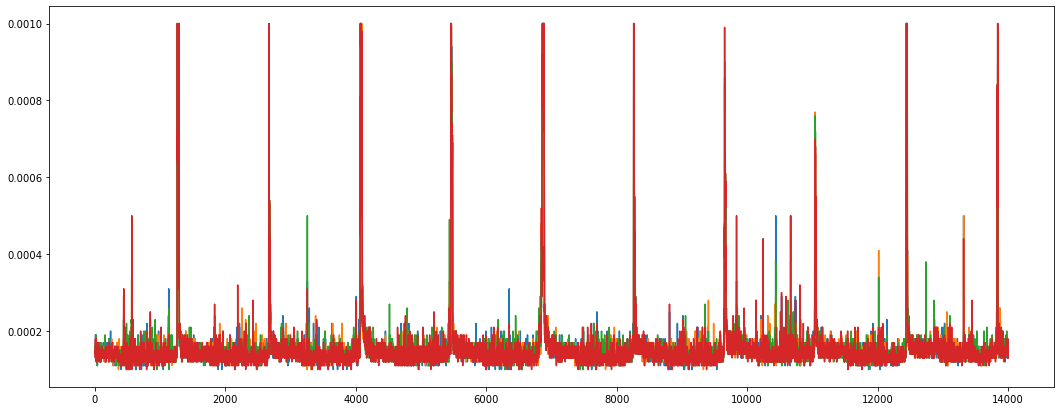

In [69]:
plt.figure(figsize=(18,7))
plt.plot(SPREAD_EUR_USD_20200921.T[0,:14000])
plt.plot(SPREAD_EUR_USD_20200921.T[1,:14000])
plt.plot(SPREAD_EUR_USD_20200921.T[2,:14000])
plt.plot(SPREAD_EUR_USD_20200921.T[3,:14000])
plt.show()

In [68]:
60*24

1440

In [87]:
EUR_USD_20200921_ASK["c"] - EUR_USD_20200921_BID["c"]

time
2020-09-21 00:00:00    0.00014
2020-09-21 00:01:00    0.00015
2020-09-21 00:02:00    0.00014
2020-09-21 00:03:00    0.00015
2020-09-21 00:04:00    0.00015
                        ...   
2020-10-29 23:56:00    0.00011
2020-10-29 23:57:00    0.00014
2020-10-29 23:58:00    0.00012
2020-10-29 23:59:00    0.00014
2020-10-30 00:00:00    0.00013
Name: c, Length: 40570, dtype: float64

In [83]:
import pandas as pd

In [89]:
EUR_USD_20200921 = pd.DataFrame()

In [92]:
for p in "ohlc":
    print(p)
    EUR_USD_20200921['sprd_{}'.format(p)] = EUR_USD_20200921_ASK['{}'.format(p)] - \
                                            EUR_USD_20200921_BID['{}'.format(p)] 
    EUR_USD_20200921['ask_{}'.format(p)] =  EUR_USD_20200921_ASK['{}'.format(p)]
    EUR_USD_20200921['bid_{}'.format(p)] =  EUR_USD_20200921_BID['{}'.format(p)] 
EUR_USD_20200921['volume'] = EUR_USD_20200921_ASK["volume"]

o
h
l
c


In [95]:
EUR_USD_20200921.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 40570 entries, 2020-09-21 00:00:00 to 2020-10-30 00:00:00
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sprd_o  40570 non-null  float64
 1   ask_o   40570 non-null  float64
 2   bid_o   40570 non-null  float64
 3   sprd_h  40570 non-null  float64
 4   ask_h   40570 non-null  float64
 5   bid_h   40570 non-null  float64
 6   sprd_l  40570 non-null  float64
 7   ask_l   40570 non-null  float64
 8   bid_l   40570 non-null  float64
 9   sprd_c  40570 non-null  float64
 10  ask_c   40570 non-null  float64
 11  bid_c   40570 non-null  float64
 12  volume  40570 non-null  int64  
dtypes: float64(12), int64(1)
memory usage: 4.3 MB


In [94]:
EUR_USD_20200921.head()

,sprd_o,ask_o,bid_o,sprd_h,ask_h,bid_h,sprd_l,ask_l,bid_l,sprd_c,ask_c,bid_c,volume
time,,,,,,,,,,,,,
2020-09-21 00:00:00,0.00016,1.18463,1.18447,0.00014,1.18470,1.18456,0.00015,1.18458,1.18443,0.00014,1.18470,1.18456,24
2020-09-21 00:01:00,0.00014,1.18469,1.18455,0.00015,1.18481,1.18466,0.00015,1.18468,1.18453,0.00015,1.18481,1.18466,19
2020-09-21 00:02:00,0.00016,1.18480,1.18464,0.00014,1.18486,1.18472,0.00014,1.18475,1.18461,0.00014,1.18486,1.18472,20
2020-09-21 00:03:00,0.00014,1.18487,1.18473,0.00015,1.18501,1.18486,0.00014,1.18485,1.18471,0.00015,1.18501,1.18486,22
2020-09-21 00:04:00,0.00015,1.18499,1.18484,0.00014,1.18500,1.18486,0.00015,1.18491,1.18476,0.00015,1.18491,1.18476,17


In [97]:
EUR_USD_20200921['c'] = EUR_USD_20200921_ASK['c'.format(p)] + \
                                            EUR_USD_20200921_BID['c']
EUR_USD_20200921.head()

,sprd_o,ask_o,bid_o,sprd_h,ask_h,bid_h,sprd_l,ask_l,bid_l,sprd_c,ask_c,bid_c,volume,c
time,,,,,,,,,,,,,,
2020-09-21 00:00:00,0.00016,1.18463,1.18447,0.00014,1.18470,1.18456,0.00015,1.18458,1.18443,0.00014,1.18470,1.18456,24,2.36926
2020-09-21 00:01:00,0.00014,1.18469,1.18455,0.00015,1.18481,1.18466,0.00015,1.18468,1.18453,0.00015,1.18481,1.18466,19,2.36947
2020-09-21 00:02:00,0.00016,1.18480,1.18464,0.00014,1.18486,1.18472,0.00014,1.18475,1.18461,0.00014,1.18486,1.18472,20,2.36958
2020-09-21 00:03:00,0.00014,1.18487,1.18473,0.00015,1.18501,1.18486,0.00014,1.18485,1.18471,0.00015,1.18501,1.18486,22,2.36987
2020-09-21 00:04:00,0.00015,1.18499,1.18484,0.00014,1.18500,1.18486,0.00015,1.18491,1.18476,0.00015,1.18491,1.18476,17,2.36967


In [99]:
api??

In [100]:
import pandas as pd


In [101]:
df2 = pd.DataFrame([[5, 6], [7, 8]], columns=list('AB'))

In [102]:
df2

,A,B
0,5,6
1,7,8


In [105]:
df2.append(pd.DataFrame([[3,3]], columns=list('AB')), ignore_index=True) 

,A,B
0,5,6
1,7,8
2,3,3


In [106]:
df2

,A,B
0,5,6
1,7,8
